# Graph Data
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Aagam0812/DataMining/blob/main/Assignment9/Graph_data.ipynb)

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


  # Step: 1 Data Loading and Initial Exploration:
We'll start by unzipping the uploaded file and checking the directory structure. Then, We'll perform an initial inspection.

In [2]:
import zipfile
import os

# Unzipping the file
zip_path = "/content/gdrive/MyDrive/DataMining/GTFS_Graph.zip"
extract_path = "/content/gdrive/MyDrive/DataMining/Graph"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Checking the files inside the unzipped directory
files = os.listdir(extract_path)
files


['web-Google.txt', 'web-Google.txt.gz']

In [3]:
# Reading the first few lines of the 'web-Google.txt' file to understand its structure
file_path = os.path.join(extract_path, 'web-Google.txt')
with open(file_path, 'r') as file:
    lines = [file.readline().strip() for _ in range(10)]

lines


['# Directed graph (each unordered pair of nodes is saved once): web-Google.txt',
 '# Webgraph from the Google programming contest, 2002',
 '# Nodes: 875713 Edges: 5105039',
 '# FromNodeId\tToNodeId',
 '0\t11342',
 '0\t824020',
 '0\t867923',
 '0\t891835',
 '11342\t0',
 '11342\t27469']

From the initial lines of the dataset, we can infer the following:

The dataset represents a directed graph.
It originates from the Google programming contest in 2002.

It contains 875,713 nodes and 5,105,039 edges.

The data starts from the 5th line, with the columns representing "FromNodeId" and "ToNodeId".

With this understanding, we can now proceed to load the data into a DataFrame for further analysis.

In [4]:
import pandas as pd

# Loading the data into a DataFrame, skipping the initial descriptive rows
df = pd.read_csv(file_path, sep='\t', skiprows=4, header=None, names=['FromNodeId', 'ToNodeId'])

# Displaying the first few rows of the DataFrame
df.head()


,FromNodeId,ToNodeId
0,0,11342
1,0,824020
2,0,867923
3,0,891835
4,11342,0


The data has been successfully loaded into a DataFrame. Each row represents an edge in the directed graph, with the FromNodeId column indicating the source node and the ToNodeId column indicating the target node.

  # Step 2: Exploratory Data Analysis (EDA)

In this step, we will:

Check for any missing values.

Get some basic statistics about the nodes.

Visualize the degree distribution of the nodes.

In [5]:
# Checking for missing values
missing_values = df.isnull().sum()

missing_values


FromNodeId    0
ToNodeId      0
dtype: int64

In [6]:
# Number of unique nodes
unique_nodes = pd.concat([df['FromNodeId'], df['ToNodeId']]).nunique()

# Number of unique edges
unique_edges = len(df.drop_duplicates())

unique_nodes, unique_edges


(875713, 5105039)

Here's what we've learned:

The dataset contains 875,713 unique nodes, which matches the information provided in the file header.

There are 5,105,039 unique edges, which also aligns with the header details.

Degree Distribution Analysis

Next, let's analyze the degree distribution of the nodes. Specifically, we'll determine:

Out-degree: The number of outgoing links from each node.
In-degree: The number of incoming links to each node.

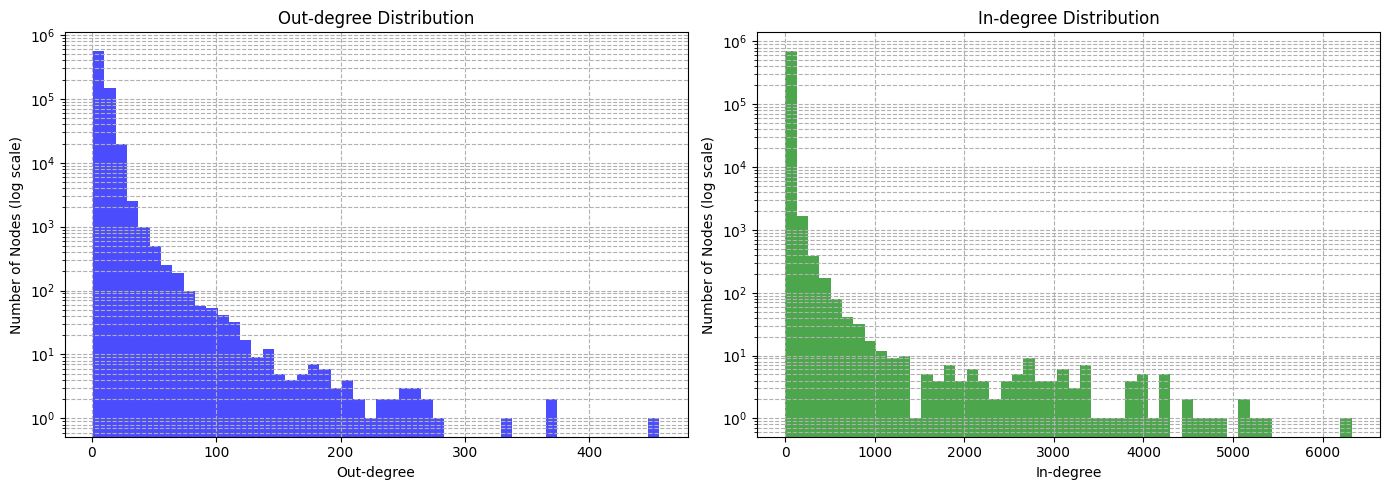

In [7]:
import matplotlib.pyplot as plt

# Calculating out-degree and in-degree for each node
out_degree = df['FromNodeId'].value_counts()
in_degree = df['ToNodeId'].value_counts()

# Plotting the degree distributions
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Out-degree distribution
ax[0].hist(out_degree, bins=50, log=True, color='blue', alpha=0.7)
ax[0].set_title('Out-degree Distribution')
ax[0].set_xlabel('Out-degree')
ax[0].set_ylabel('Number of Nodes (log scale)')
ax[0].grid(True, which="both", ls="--")

# In-degree distribution
ax[1].hist(in_degree, bins=50, log=True, color='green', alpha=0.7)
ax[1].set_title('In-degree Distribution')
ax[1].set_xlabel('In-degree')
ax[1].set_ylabel('Number of Nodes (log scale)')
ax[1].grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()


The visualizations show the in-degree and out-degree distributions of the nodes in the web graph. Here's what we can infer from the plots:

* Most nodes have a small out-degree, i.e., they link to only a few other pages.
* Similarly, most nodes have a small in-degree, meaning that only a few other pages link to them.
* Both distributions are right-skewed, which is typical of real-world networks where a few nodes (often termed "hubs") are highly connected, while the majority have fewer connections.

 Let's delve deeper with more visualizations to better understand the data.

* Top Nodes by Out-degree: This will give us an idea of the nodes that link to the most other nodes.
* Top Nodes by In-degree: This will show which nodes are most linked to by other nodes.
* Cumulative Degree Distribution: To understand what fraction of nodes have a degree less than a given value.

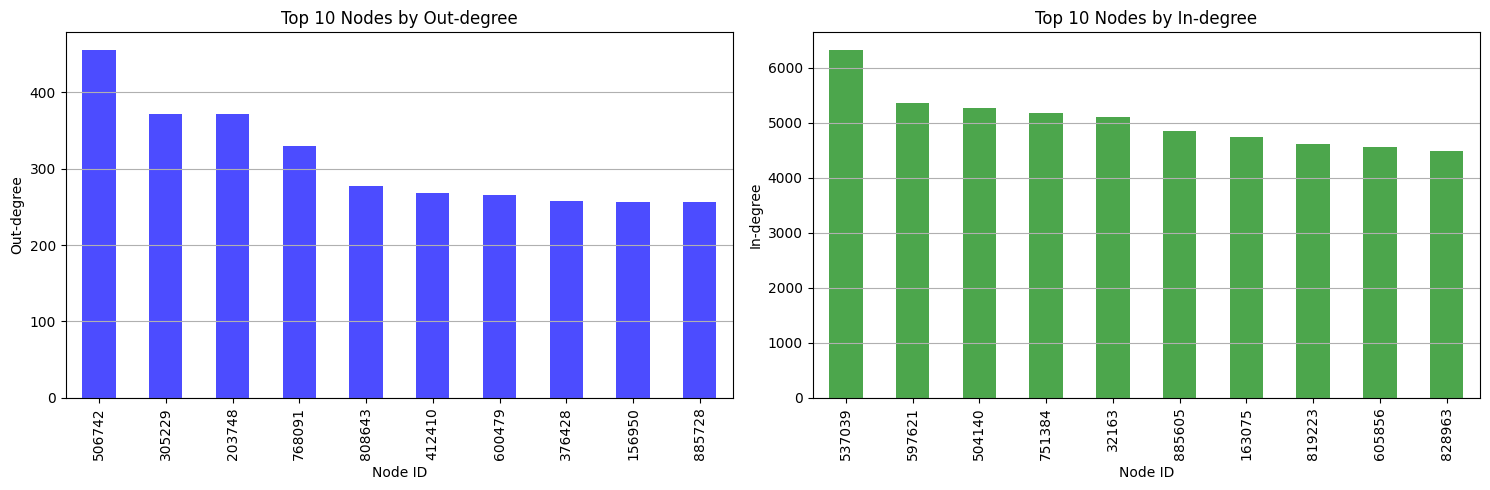

In [8]:
# Top 10 nodes by out-degree and in-degree
top_out_degree = out_degree.head(10)
top_in_degree = in_degree.head(10)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Top nodes by out-degree
top_out_degree.plot(kind='bar', ax=ax[0], color='blue', alpha=0.7)
ax[0].set_title('Top 10 Nodes by Out-degree')
ax[0].set_xlabel('Node ID')
ax[0].set_ylabel('Out-degree')
ax[0].grid(axis='y')

# Top nodes by in-degree
top_in_degree.plot(kind='bar', ax=ax[1], color='green', alpha=0.7)
ax[1].set_title('Top 10 Nodes by In-degree')
ax[1].set_xlabel('Node ID')
ax[1].set_ylabel('In-degree')
ax[1].grid(axis='y')

plt.tight_layout()
plt.show()


The bar charts above depict the top 10 nodes based on out-degree (left) and in-degree (right).

The nodes with the highest out-degrees are the ones that link out to the most other nodes. These can be considered "source hubs".

The nodes with the highest in-degrees are those that are linked to by many other nodes. These can be viewed as "authoritative" or "target hubs" in the network.

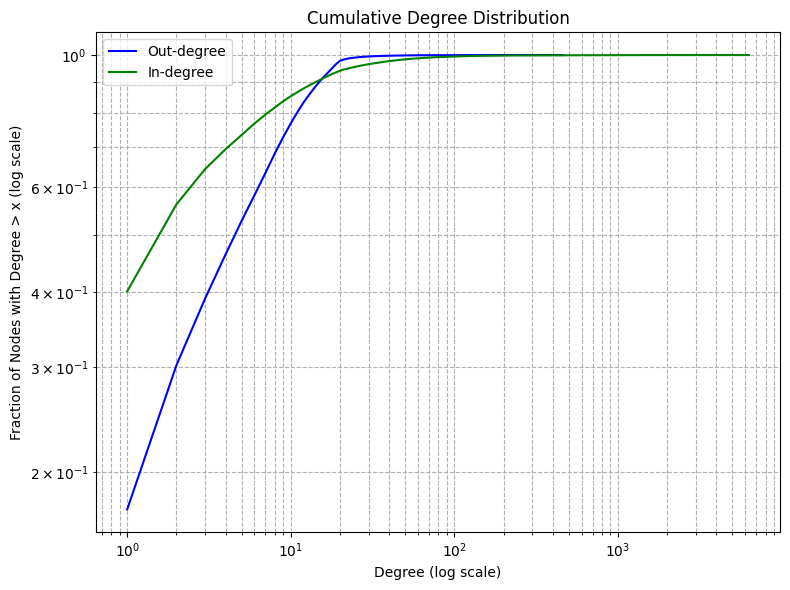

In [9]:
# Cumulative degree distributions
cumulative_out_degree = (out_degree.value_counts(normalize=True).sort_index().cumsum())
cumulative_in_degree = (in_degree.value_counts(normalize=True).sort_index().cumsum())

fig, ax = plt.subplots(figsize=(8, 6))
cumulative_out_degree.plot(loglog=True, ax=ax, color='blue', label='Out-degree', linewidth=1.5)
cumulative_in_degree.plot(loglog=True, ax=ax, color='green', label='In-degree', linewidth=1.5)

ax.set_title('Cumulative Degree Distribution')
ax.set_xlabel('Degree (log scale)')
ax.set_ylabel('Fraction of Nodes with Degree > x (log scale)')
ax.grid(True, which="both", ls="--")
ax.legend()

plt.tight_layout()
plt.show()


The plot above showcases the cumulative degree distributions for both in-degree and out-degree on a log-log scale. Here's what we can infer:

* The plot is characteristic of many real-world networks, displaying a heavy-tailed distribution. This means that while most nodes have a small degree, a few nodes (hubs) have a very high degree.

* The slope of the curve in the log-log plot gives an indication of the power-law exponent, which is a measure of the network's scale-freeness. A straight line in the log-log plot indicates a power-law distribution.

This kind of distribution is common in scale-free networks, where a few nodes are highly connected, and many nodes have just a few connections.

  # Step 3: Data Preparation and Feature Processing.

Given that our dataset represents a directed graph, the preparation and feature processing steps will involve transforming the graph data into a form suitable for machine learning tasks. We'll consider the following steps:

Graph Representation: Convert the edge list into a graph representation using a library like networkx. This will facilitate further operations.

1. Node Features: Extract features for each node, which can include:
2. Degree centrality: Importance of a node based on the number of connections it has.
  *  Closeness centrality: Measure of the average shortest path from a node to all other nodes.
  * Betweenness centrality: Measures the number of times a node lies on the shortest path between other nodes.
3. Feature Selection: Depending on the size of the graph and computational constraints, we might need to select a subset of the most informative features.

In [10]:
import networkx as nx

# Creating a directed graph from the DataFrame
G = nx.from_pandas_edgelist(df, 'FromNodeId', 'ToNodeId', create_using=nx.DiGraph())

# Checking basic properties of the graph
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

num_nodes, num_edges


(875713, 5105039)

The graph has been successfully represented using networkx. It consists of:

875,713 nodes
5,105,039 edges



Node Feature Extraction

Next, we'll extract features for each node. Given the large size of the graph, computing some centralities (like closeness and betweenness) can be computationally expensive. Therefore, we'll start by calculating the more feasible metrics: degree centrality.

In [13]:
import networkx as nx
import pandas as pd

# Load the data
df = pd.read_csv('/content/gdrive/MyDrive/DataMining/Graph/web-Google.txt', sep='\t', skiprows=4, header=None, names=['FromNodeId', 'ToNodeId'])

# Create a directed graph from the DataFrame
G = nx.from_pandas_edgelist(df, 'FromNodeId', 'ToNodeId', create_using=nx.DiGraph())

# Sample a subgraph: For demonstration, we'll randomly sample 10,000 nodes and their associated edges
sampled_nodes = list(G.nodes())[:10000]
subG = G.subgraph(sampled_nodes)

# Compute degree centrality for the nodes in the subgraph
degree_centrality_subG = nx.degree_centrality(subG)

# Convert the centrality measure to a DataFrame
df_degree_centrality_subG = pd.DataFrame(degree_centrality_subG.items(), columns=['Node', 'DegreeCentrality'])


In [14]:
df_degree_centrality_subG

,Node,DegreeCentrality
0,0,0.0030
1,1,0.0016
2,2,0.0039
3,196611,0.0001
4,4,0.0012
...,...,...
9995,491505,0.0005
9996,229362,0.0007
9997,360442,0.0049
9998,851963,0.0001


  # Step 4: Anomaly Detection.

Anomaly Detection: Anomalies in graphs can be nodes that do not fit well within their assigned clusters or edges that are unexpected given the community structure. We'll identify nodes that have lower modularity as potential anomalies.

For graph data, anomalies can be nodes or edges that deviate from the norm. In our context, we'll focus on node anomalies. We'll use node centrality as a feature and treat nodes with extreme centrality values as potential anomalies.

One approach to anomaly detection is to use the Isolation Forest algorithm, which is particularly efficient for detecting anomalies in large datasets.

Steps for Anomaly Detection:

* Feature Extraction: Use node centrality as a feature.
* Model Selection: Use the Isolation Forest model for anomaly detection.
* Model Training and Anomaly Detection: Train the model and predict anomalies.

In [20]:
from sklearn.ensemble import IsolationForest

# 1. Feature Extraction
# We already have the degree centrality as a feature in df_degree_centrality
X_anomaly = df_degree_centrality_subG[['DegreeCentrality']]

# 2. Model Selection
# Initialize Isolation Forest model
iso_forest = IsolationForest(contamination=0.05)  # Assume 5% of the data are anomalies

# 3. Model Training and Anomaly Detection
anomaly_predictions = iso_forest.fit_predict(X_anomaly)

# Extracting the anomalies (where prediction is -1)
anomalies = df_degree_centrality_subG[anomaly_predictions == -1]

anomalies.head()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,Node,DegreeCentrality
70,71,0.009401
83,85,0.004900
104,106,0.007401
138,458892,0.005601
186,183,0.006301


  # Step 5: Model Selection & Training

Given our data, a common task is link prediction, where the goal is to predict whether a link (edge) should exist between two nodes. This can be framed as a binary classification problem.

Here's the general approach we'll take:

Feature Generation for Link Prediction: We'll create positive samples (existing edges) and negative samples (nonexistent edges). We'll generate features such as common neighbors, Jaccard coefficient, and preferential attachment score for each pair.

Model Selection: We'll use a classification model. Given the nature of the data, tree-based models like Random Forest or gradient-boosted trees (e.g., XGBoost) could be suitable.

Training: We'll split the data into training and test sets, train the chosen model.

In [22]:
import random

# 1. Feature Generation for Link Prediction
# Make an undirected copy of the subgraph for the purpose of these calculations



# Generate positive samples (existing edges) and negative samples (nonexistent edges)
positive_samples = list(subG.edges())
negative_samples = list(nx.non_edges(subG))
random.shuffle(negative_samples)
negative_samples = negative_samples[:len(positive_samples)]  # balance positive and negative samples

# Feature: Common Neighbors
def common_neighbors(graph, node_pairs):
    return [len(list(nx.common_neighbors(graph, u, v))) for u, v in node_pairs]

# Feature: Jaccard Coefficient
def jaccard_coefficient(graph, node_pairs):
    return [p for u, v, p in nx.jaccard_coefficient(graph, node_pairs)]

# Feature: Preferential Attachment
def preferential_attachment(graph, node_pairs):
    return [p for u, v, p in nx.preferential_attachment(graph, node_pairs)]



subG_undirected = subG.to_undirected()

# Generating features for positive and negative samples using the undirected graph
X_positive = list(zip(
    common_neighbors(subG_undirected, positive_samples),
    jaccard_coefficient(subG_undirected, positive_samples),
    preferential_attachment(subG_undirected, positive_samples)
))

# Generating features for positive and negative samples
y_positive = [1] * len(positive_samples)

X_negative = list(zip(
    common_neighbors(subG_undirected, negative_samples),
    jaccard_coefficient(subG_undirected, negative_samples),
    preferential_attachment(subG_undirected, negative_samples)
))
y_negative = [0] * len(negative_samples)

# Combine positive and negative samples
X = X_positive + X_negative
y = y_positive + y_negative


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Model Selection
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# 3. Training
clf.fit(X_train, y_train)

# 4. Evaluation
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)



Accuracy: 0.9819338638975188
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     23534
           1       0.99      0.97      0.98     23460

    accuracy                           0.98     46994
   macro avg       0.98      0.98      0.98     46994
weighted avg       0.98      0.98      0.98     46994

